In [1]:
import matplotlib.pyplot as plt
import torch
from torch import nn

In [2]:
from torch.utils.data.dataset import Dataset

class RNNData(Dataset):
    def __init__(self):
        pass
    
    def __len__(self):
        return 100
    
    def __getitem__(self, index):
        L = torch.randint(-10, 10, (1,)).item()
        self.x = torch.sin(torch.linspace(L, L+3., 51))
        self.x = self.x.view(len(self.x), -1)
        return self.x[:50], self.x[-1]

In [3]:
dataset = RNNData()

In [4]:
dataset[25]

(tensor([[-0.7568],
         [-0.7946],
         [-0.8296],
         [-0.8616],
         [-0.8905],
         [-0.9162],
         [-0.9386],
         [-0.9576],
         [-0.9731],
         [-0.9852],
         [-0.9937],
         [-0.9986],
         [-1.0000],
         [-0.9977],
         [-0.9919],
         [-0.9825],
         [-0.9695],
         [-0.9531],
         [-0.9332],
         [-0.9100],
         [-0.8835],
         [-0.8538],
         [-0.8210],
         [-0.7853],
         [-0.7468],
         [-0.7055],
         [-0.6618],
         [-0.6156],
         [-0.5673],
         [-0.5169],
         [-0.4646],
         [-0.4107],
         [-0.3553],
         [-0.2986],
         [-0.2408],
         [-0.1822],
         [-0.1229],
         [-0.0631],
         [-0.0032],
         [ 0.0568],
         [ 0.1165],
         [ 0.1759],
         [ 0.2346],
         [ 0.2925],
         [ 0.3493],
         [ 0.4048],
         [ 0.4590],
         [ 0.5114],
         [ 0.5620],
         [ 0.6106]])

In [5]:
from torch.utils.data import DataLoader

batch_size = 1

dataloader = DataLoader(dataset, batch_size = batch_size)

In [6]:
class RNNModel(torch.nn.Module):
    def __init__(self):
        super(RNNModel, self).__init__()
        self.hidden_size = 4
        self.rnn = torch.nn.GRU(input_size = 1, hidden_size = self.hidden_size, num_layers=1, batch_first=True)
        self.linear = torch.nn.Linear(self.hidden_size, 1)
    
    def forward(self, x):
        out, hid = self.rnn(x)
        out = self.linear(out[:,-1,:])
        return out

In [7]:
model = RNNModel()

In [8]:
criterion = torch.nn.MSELoss() 

In [9]:
optimizer = torch.optim.Adam(model.parameters(), lr=.01)

In [10]:
class AverageMeter:
    def __init__(self):
        self.val = 0.
        self.avg = 0.
        self.sum = 0.
        self.count = 0.
    
    def update(self, val, n = 1):
        self.val = val
        self.sum = self.sum + val*n
        self.count = self.count + n
        self.avg = self.sum / self.count
    
    def get_avg(self):
        return self.avg

In [11]:
LOSSES = []

for epoch in range(20):
    
    averagemeter = AverageMeter()
    
    for x, y in dataloader:
        h_0 = torch.zeros(1,10,1)
        y_hat = model(x)
        loss = criterion(y_hat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        averagemeter.update(val=loss.item())
    
    LOSSES.append(averagemeter.get_avg())
    print(f"Epoch: {epoch} Loss: {loss.item()}")

Epoch: 0 Loss: 0.02001642994582653
Epoch: 1 Loss: 0.007860062643885612
Epoch: 2 Loss: 0.0011969550978392363
Epoch: 3 Loss: 0.0002812270831782371
Epoch: 4 Loss: 0.0022689984180033207
Epoch: 5 Loss: 0.00033106791670434177
Epoch: 6 Loss: 0.0009804629953578115
Epoch: 7 Loss: 2.6972151317750104e-05
Epoch: 8 Loss: 0.0016707768663764
Epoch: 9 Loss: 0.00032349402317777276
Epoch: 10 Loss: 0.0002986431063618511
Epoch: 11 Loss: 5.085534576210193e-05
Epoch: 12 Loss: 0.00023427853011526167
Epoch: 13 Loss: 2.9524953788495623e-06
Epoch: 14 Loss: 0.00015948944201227278
Epoch: 15 Loss: 0.0005435203202068806
Epoch: 16 Loss: 9.09631580725545e-06
Epoch: 17 Loss: 0.0018317897338420153
Epoch: 18 Loss: 0.00350995478220284
Epoch: 19 Loss: 1.4265483514463995e-05


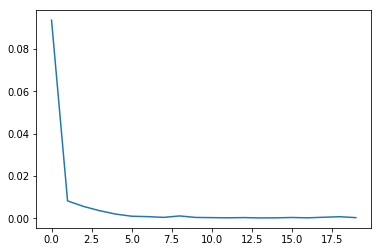

In [12]:
plt.plot(LOSSES[:])

In [13]:
AC = []
PR = []
with torch.no_grad():
    for x, y in dataloader:
        y_hat = model(x)
        print(y_hat, y)
        AC.append(y.item())
        PR.append(y_hat.item())

tensor([[-0.3350]]) tensor([[-0.2794]])
tensor([[-0.0256]]) tensor([[0.]])
tensor([[0.9410]]) tensor([[0.9093]])
tensor([[0.8572]]) tensor([[0.8415]])
tensor([[-0.8313]]) tensor([[-0.7568]])
tensor([[0.7869]]) tensor([[0.7568]])
tensor([[0.7869]]) tensor([[0.7568]])
tensor([[0.7869]]) tensor([[0.7568]])
tensor([[-0.8313]]) tensor([[-0.7568]])
tensor([[0.7869]]) tensor([[0.7568]])
tensor([[-0.3350]]) tensor([[-0.2794]])
tensor([[-0.9848]]) tensor([[-0.9093]])
tensor([[0.2758]]) tensor([[0.2794]])
tensor([[0.4187]]) tensor([[0.4121]])
tensor([[0.8572]]) tensor([[0.8415]])
tensor([[0.7869]]) tensor([[0.7568]])
tensor([[-0.6205]]) tensor([[-0.5366]])
tensor([[-0.1825]]) tensor([[-0.1411]])
tensor([[-0.9848]]) tensor([[-0.9093]])
tensor([[-1.0806]]) tensor([[-1.0000]])
tensor([[0.2758]]) tensor([[0.2794]])
tensor([[0.1238]]) tensor([[0.1411]])
tensor([[0.9410]]) tensor([[0.9093]])
tensor([[0.6694]]) tensor([[0.6570]])
tensor([[-0.3350]]) tensor([[-0.2794]])
tensor([[-1.0491]]) tensor([[-0.9

In [14]:
x, y = next(iter(dataloader))

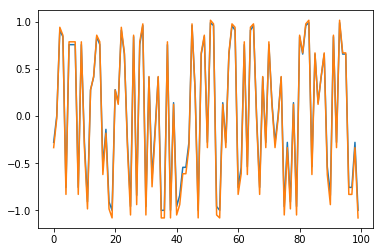

In [15]:
plt.plot(AC)
plt.plot(PR)